In [2]:
# Sequence plot
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
dfAll = pd.read_csv('./../out/Allevent.txt',encoding='utf-16',index_col=0)
dfAlln=dfAll[18:]
winlenidx=2 #0,1,2,3
winsizels=[10,14,20,30]
sepevent=dfAlln.loc[~np.insert((np.diff(dfAlln.iloc[:,2])<winsizels[winlenidx]*3/2)&(np.abs(np.diff(dfAlln.iloc[:,2]))<3933),0,False)]
sepevent.head()

,sujet,match,Absolute_sec,event,emotions,arousal,valence
18,2,1,38404,arret du gardien,frustration,2.0,-3.0
19,2,1,38495,arbitrage,colere,2.0,-1.0
20,2,1,38613,tir,peur,3.0,2.0
21,2,1,38851,rate,frustration,0.0,-1.0
24,2,1,38941,rate,frustration,2.0,-2.0


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

seqlen=20
path='./../'
baserep ='biopacBase'+str(seqlen)+'_random/'
beforerep = 'biopacBeforeEvent'+str(seqlen)+'s/'
eventrep ='biopacEvent'+str(seqlen)+'s/'

#grouped= sepevent.groupby('sujet')
#idx=grouped.get_group(sujet).index.values
#nl=len(idx)

#plt.figure(figsize=(3.841, 7.195), dpi=100)
#( your code ...)
#plt.savefig('myfig.png', dpi=1000)



for sujet,X in sepevent.groupby('sujet'):
    idx=X.index.values
    for ni,eventidx in enumerate(idx):
        filename='S_'+str(sujet)+'_'+str(eventidx)+'_.txt'
        adffile=path+beforerep+filename
        bdffile=path+eventrep+filename

        adf=pd.read_csv(adffile,sep='\t',header=None,usecols=[1,3,6,7,9],names=['rsp', 'emg_s','eda','ecg','emg_f'])
        bdf=pd.read_csv(bdffile,sep='\t',header=None,usecols=[1,3,6,7,9],names=['rsp', 'emg_s','eda','ecg','emg_f'])
        df=pd.concat([adf,bdf]).reset_index(drop=True)
        tit='Sujet_'+str(sujet)+'_event_'+str(eventidx)+': ' +dfAll.ix[eventidx,'emotions'] + '('+str(dfAll.ix[eventidx,'arousal'])+','+str(dfAll.ix[eventidx,'valence'])+')'
        fig = plt.figure(figsize=(15,160),facecolor='w') 
        df.plot(subplots=True,title=tit);
        savename='./../out/plot/'+str(eventidx)+'_S_'+str(sujet)+'.pdf'
        plt.savefig(savename)
        plt.close(fig)




In [6]:
for sujet,X in sepevent.groupby('sujet'):
    idx=X.index.values
    for ni,eventidx in enumerate(idx):
        print(sujet,ni,eventidx)

(2, 0, 18)
(2, 1, 19)
(2, 2, 20)
(2, 3, 21)
(2, 4, 24)
(2, 5, 25)
(2, 6, 26)
(2, 7, 27)
(2, 8, 32)
(2, 9, 35)
(2, 10, 37)
(2, 11, 40)
(2, 12, 42)
(2, 13, 43)
(2, 14, 44)
(2, 15, 51)
(2, 16, 53)
(2, 17, 55)
(2, 18, 59)
(2, 19, 60)
(2, 20, 64)
(3, 0, 65)
(3, 1, 66)
(3, 2, 67)
(3, 3, 69)
(3, 4, 72)
(3, 5, 75)
(3, 6, 76)
(3, 7, 78)
(3, 8, 82)
(3, 9, 84)
(3, 10, 85)
(3, 11, 88)
(3, 12, 89)
(3, 13, 90)
(3, 14, 93)
(3, 15, 101)
(3, 16, 102)
(3, 17, 104)
(3, 18, 105)
(3, 19, 107)
(3, 20, 109)
(3, 21, 110)
(4, 0, 111)
(4, 1, 114)
(4, 2, 115)
(4, 3, 116)
(4, 4, 118)
(4, 5, 119)
(4, 6, 121)
(4, 7, 122)
(4, 8, 123)
(4, 9, 124)
(4, 10, 125)
(4, 11, 126)
(4, 12, 127)
(4, 13, 128)
(4, 14, 129)
(4, 15, 130)
(4, 16, 132)
(4, 17, 133)
(4, 18, 134)
(4, 19, 135)
(4, 20, 136)
(4, 21, 138)
(4, 22, 139)
(4, 23, 140)
(4, 24, 141)
(4, 25, 142)
(5, 0, 143)
(5, 1, 144)
(5, 2, 145)
(5, 3, 148)
(5, 4, 149)
(5, 5, 150)
(5, 6, 153)
(5, 7, 154)
(5, 8, 155)
(5, 9, 156)
(5, 10, 157)
(5, 11, 158)
(5, 12, 159)
(5, 13, 16

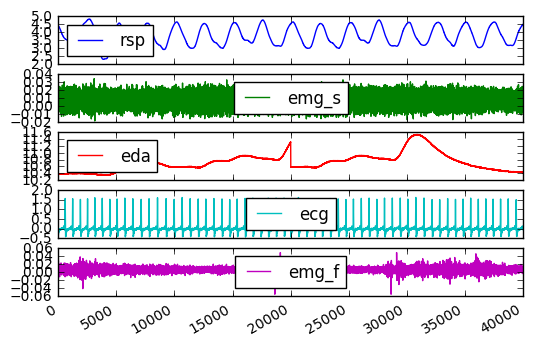

In [5]:
ni=0;
eventidx=18
sujet=2
fig = plt.figure(figsize=(15,160),facecolor='w') 
#fig, axes = plt.subplots(nrows=nl, ncols=2)
pp = PdfPages('foo.pdf')
fig = plt.figure(figsize=(15,1600),facecolor='w') 
filename='S_'+str(sujet)+'_'+str(eventidx)+'_.txt'
adffile=path+beforerep+filename
bdffile=path+eventrep+filename

adf=pd.read_csv(adffile,sep='\t',header=None,usecols=[1,3,6,7,9],names=['rsp', 'emg_s','eda','ecg','emg_f'])
bdf=pd.read_csv(bdffile,sep='\t',header=None,usecols=[1,3,6,7,9],names=['rsp', 'emg_s','eda','ecg','emg_f'])
df=pd.concat([adf,bdf]).reset_index(drop=True)
df.plot(subplots=True);
pp.savefig(fig)

In [8]:
idx[0]

array([18, 19, 20, 21, 24, 25, 26, 27, 32, 35, 37, 40, 42, 43, 44, 51, 53,
       55, 59, 60, 64])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f907b70dd90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f906b1a33d0>], dtype=object)

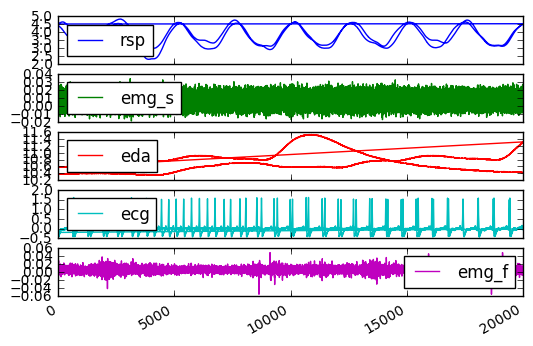

In [16]:
adf=pd.read_csv('/home/wenlu/Documents/XPFIFA/biopacBeforeEvent20s/S_2_18_.txt',sep='\t',header=None,usecols=[1,3,6,7,9],names=['rsp', 'emg_s','eda','ecg','emg_f'])
bdf=pd.read_csv('/home/wenlu/Documents/XPFIFA/biopacEvent20s/S_2_18_.txt',sep='\t',header=None,usecols=[1,3,6,7,9],names=['rsp', 'emg_s','eda','ecg','emg_f'])
df=pd.concat([adf,bdf])
df.plot(subplots=True)

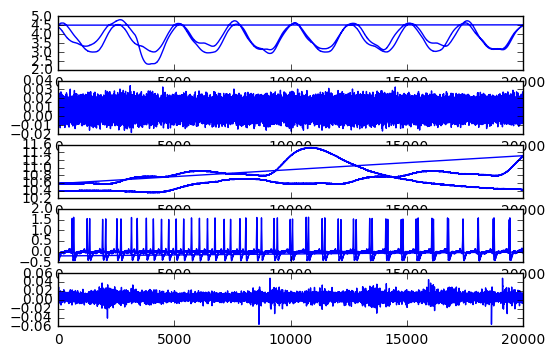

In [39]:
for i,j in enumerate(df):
    plt.subplot(5,1,i+1)
    plt.plot(df[j])